In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
file_path = r"C:\Users\mvy48\OneDrive\Documents\new\projects\data.csv"
data = pd.read_csv(file_path)
data = data.head(10000)

data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
print(data.columns)

data.isnull().sum()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
data = data.drop(columns=['date'])

X = data.drop(columns=['price'])
y = data['price']

X = pd.get_dummies(X, drop_first=True)

In [ ]:
combined_data = pd.concat([X, y], axis=1)

print(f"Rows before outlier removal: {combined_data.shape[0]}")

numeric_data = combined_data.select_dtypes(include=[np.number])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numeric_filtered_data = numeric_data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]

print(f"Rows after numeric outlier removal: {numeric_filtered_data.shape[0]}")


Rows before outlier removal: 4600
Rows after numeric outlier removal: 3448


In [ ]:
non_numeric_data = combined_data.select_dtypes(exclude=[np.number])
filtered_data = pd.concat([numeric_filtered_data, non_numeric_data], axis=1).dropna()

print(f"Rows after combining filtered data: {filtered_data.shape[0]}")

if filtered_data.empty:
    raise ValueError("All rows removed during outlier detection. Adjust the bounds or use an alternative method.")


Rows after combining filtered data: 3448


In [ ]:
X_filtered = filtered_data.drop(columns=['price'])
y_filtered = filtered_data['price']

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Mean Absolute Error: 76959.53571850173
Mean Squared Error: 11648586479.343004
R² Score: 0.7025520989396841


C:\Users\mvy48\AppData\Local\Temp\ipykernel_13644\374824720.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')


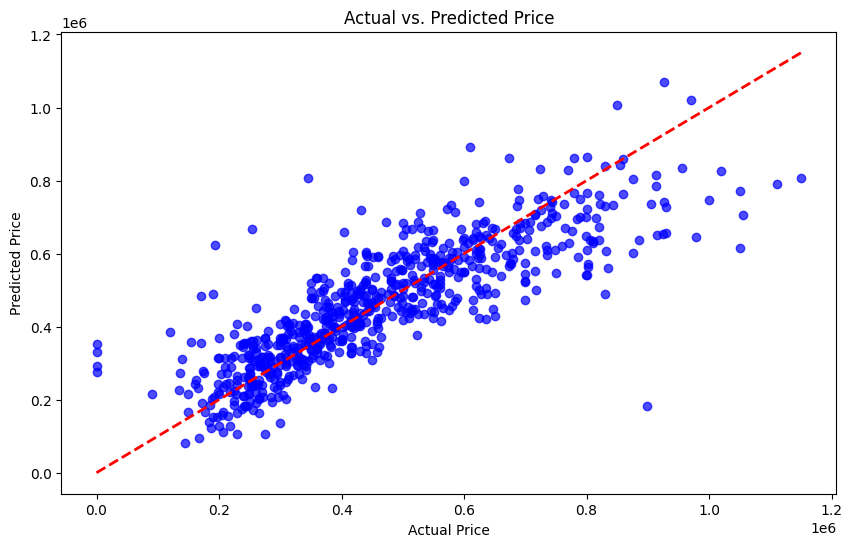

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()


In [ ]:
comparison = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})

print(comparison.head(100))


    Actual Price  Predicted Price
0       300000.0    315201.336750
1       783500.0    693412.248202
2       263000.0    243817.269098
3            0.0    291148.355504
4       473000.0    442052.102275
..           ...              ...
95      550000.0    422760.189907
96      905000.0    735355.125706
97      626000.0    600246.085387
98      488000.0    585777.020339
99      415000.0    471621.337466

[100 rows x 2 columns]
